In [39]:
import random
import matplotlib.pyplot as plt
import time
N=100

In [40]:
# print(random.random()) #losowanie liczby rzeczywistej 0 - 1
# print(random.randint(0, N-1)) #losowanie liczby całkowitej z przedziału [0, N-1]
def create_population(N):
    indexes = range(0, N)
    probability = []
    for i in indexes:
        probability.append(random.random())

    population = zip(indexes, probability)
    return list(population)
populacja = create_population(N)
true_probs = [p for (_, p) in populacja]
# print(population[0][1]) #w taki sposób można dostać się do tupla
##Łatwiejszy sposób na stworzenie populacji
# population = [(i, random.random()) for i in range(N)]

In [41]:
def algorytm1(populacja):
    count=0
    while True:
        count+=1
        calkowita_liczba_losowa = random.randint(0, N-1)
        rzeczywista_liczba_losowa = random.random()
        # print("=====")
        # print(f"Iteracja: {count}")
        # print(f"Całkowita liczba losowa: {calkowita_liczba_losowa}")
        # print(f"Rzeczywista liczba losowa: {rzeczywista_liczba_losowa}")
        # print("=====")
        for osobnik in populacja:
            if osobnik[0] == calkowita_liczba_losowa and osobnik[1] > rzeczywista_liczba_losowa:
                # print(f"Wylosowano osobnika {osobnik}, ponieważ {osobnik[1]} > {rzeczywista_liczba_losowa}")
                return osobnik
                break
            else:
                continue
    print("Nie wylosowano żadnego osobnika")

In [42]:
algorytm1(populacja)

(27, 0.6203189383271906)

In [43]:
# def algorytm2(populacja):
#     c = 0
#     nowa_populacja=[]
#     najnowsza_populacja=[]
#     for osobnik in populacja:
#         c+=osobnik[1]
#         cum_prob = (c,)
#         osobnik = osobnik + cum_prob
#         nowa_populacja.append(osobnik)
#         # print(osobnik)
#     for osobnik in nowa_populacja:
#         cum_prob = osobnik[2]
#         norm_cum_prob = (cum_prob/c,)
#         osobnik = osobnik + norm_cum_prob
#         najnowsza_populacja.append(osobnik)
#     rzeczywista_liczba_losowa = random.random()
#     for osobnik in najnowsza_populacja:
#         if osobnik[3] > rzeczywista_liczba_losowa:
#             # print(f"Wylosowano osobnika {osobnik}, ponieważ c={osobnik[2]} > p={rzeczywista_liczba_losowa}")
#             return osobnik
#             break

## Jeszcze raz bo tamten jest potwornie nieoptymalny
def algorytm2(populacja):
    cum_sum = sum(true_probs)
    cum_prob =0
    nowa_populacja=[]
    rzeczywista_liczba_losowa=random.random()
    for osobnik in populacja:
        cum_prob+=osobnik[1]
        norm_cum_prob = cum_prob/cum_sum
        osobnik=osobnik+(norm_cum_prob,)
        nowa_populacja.append(osobnik)
        if norm_cum_prob > rzeczywista_liczba_losowa:
            return osobnik
            break    

In [44]:
algorytm2(populacja)

(12, 0.502483414415336, 0.14112556292643003)

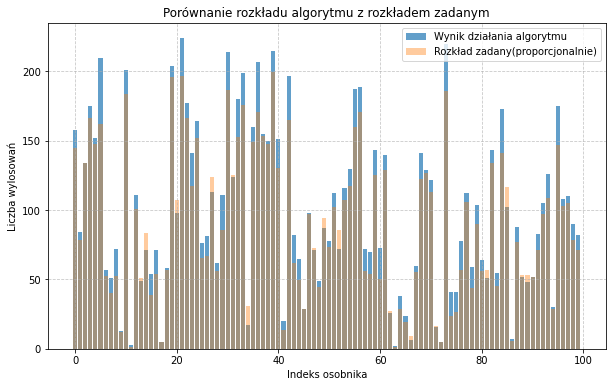

In [45]:
liczba_losowan = 10000
wyniki =[]
##Losowanie dla algorytmu 1
for _ in range(liczba_losowan):
    wyniki.append(algorytm1(populacja))

#liczba wylosowań każdego osobnika
liczba_wylosowan = [0 for _ in range(N)]
for osobnik in wyniki:
    liczba_wylosowan[osobnik[0]] += 1
    
plt.figure(figsize=(10, 6))
plt.bar(range(N), liczba_wylosowan, alpha=0.7, label="Wynik działania algorytmu")
plt.bar(range(N), [p*liczba_losowan*2/len(populacja) for p in true_probs], alpha=0.4, label="Rozkład zadany(proporcjonalnie)")
plt.xlabel('Indeks osobnika')
plt.ylabel('Liczba wylosowań')
plt.legend()
plt.title('Porównanie rozkładu algorytmu z rozkładem zadanym')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

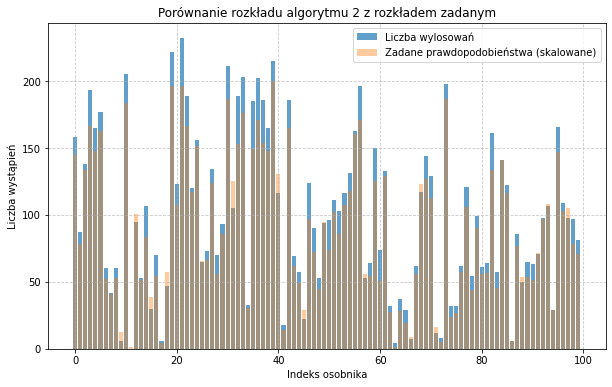

In [46]:
##Losowanie dla algorytmu 2
wyniki2=[]
for _ in range(liczba_losowan):
    wybrane=algorytm2(populacja)
    wyniki2.append(wybrane)

liczba_wylosowan2=[0 for _ in range(N)]
for osobnik in wyniki2:
    liczba_wylosowan2[osobnik[0]] +=1

#normalizacja skumulowanego prawdopodobieństwa
# cum_prob = [x/cum_sum for x in cum_prob]

# true_cum_probs = [p for (_, _, _, p) in n ]

indices = list(range(len(populacja)))
plt.figure(figsize=(10,6))
plt.bar(indices, liczba_wylosowan2, alpha=0.7, label='Liczba wylosowań')
plt.bar(indices, [p*liczba_losowan*2/len(populacja) for p in true_probs], alpha=0.4, label='Zadane prawdopodobieństwa (skalowane)')
plt.xlabel('Indeks osobnika')
plt.ylabel('Liczba wystąpień')
plt.legend()
plt.title('Porównanie rozkładu algorytmu 2 z rozkładem zadanym')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

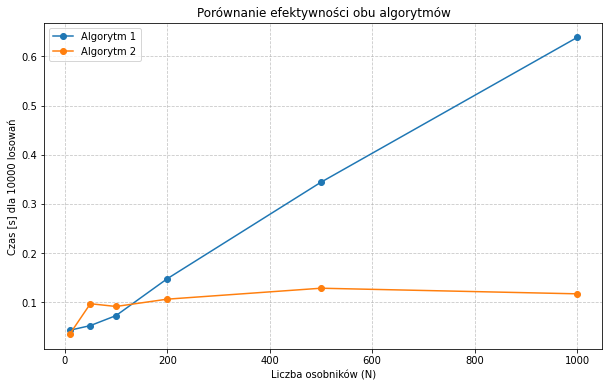

In [47]:
##Sprawdzanie sybkości obu algorytmów
rozmiary_populacji = [10, 50, 100, 200, 500, 1000]
times1 = []
times2 = []

for N in rozmiary_populacji:
    population = create_population(N)

    start = time.time()
    for _ in range(liczba_losowan):
        algorytm1(population)
    times1.append(time.time()-start)

    start = time.time()
    for _ in range(liczba_losowan):
        algorytm2(population)
    times2.append(time.time()-start)

plt.figure(figsize=(10,6))
plt.plot(rozmiary_populacji, times1, marker='o', label='Algorytm 1')
plt.plot(rozmiary_populacji, times2, marker='o', label='Algorytm 2')
plt.xlabel('Liczba osobników (N)')
plt.ylabel(f'Czas [s] dla {liczba_losowan} losowań')
plt.legend()
plt.title('Porównanie efektywności obu algorytmów')
plt.grid(linestyle='--', alpha=0.7)
plt.show()